## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  31.545973  1372.643676  0.376148   2.219334  1.483927
1  22.717351   842.003218  0.393449  10.211555  1.409959
2  94.199425  1300.386279  0.881832   1.403326  1.546181
3   2.107736   447.173097  0.298138   2.159432  1.636580
4  12.399449  1012.729356  0.049730   5.276164  1.273818


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9570824	total: 58ms	remaining: 57.9s
1:	learn: 0.9485773	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9384285	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9303306	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9196240	total: 60.1ms	remaining: 12s
5:	learn: 0.9104574	total: 60.7ms	remaining: 10.1s
6:	learn: 0.8997679	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8890780	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8790540	total: 62.1ms	remaining: 6.83s
9:	learn: 0.8695978	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8606142	total: 63ms	remaining: 5.66s
11:	learn: 0.8518574	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8442553	total: 63.8ms	remaining: 4.85s
13:	learn: 0.8360222	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8256663	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8165138	total: 65.3ms	remaining: 4.01s
16:	learn: 0.8077911	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7995376	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7929699	total: 66.6ms	remaining: 3.44s

95:	learn: 0.3984852	total: 99.5ms	remaining: 937ms
96:	learn: 0.3955508	total: 100ms	remaining: 931ms
97:	learn: 0.3923662	total: 100ms	remaining: 924ms
98:	learn: 0.3900147	total: 101ms	remaining: 918ms
99:	learn: 0.3869390	total: 101ms	remaining: 912ms
100:	learn: 0.3841584	total: 102ms	remaining: 906ms
101:	learn: 0.3817912	total: 102ms	remaining: 900ms
102:	learn: 0.3791790	total: 103ms	remaining: 894ms
103:	learn: 0.3766146	total: 103ms	remaining: 888ms
104:	learn: 0.3739144	total: 103ms	remaining: 882ms
105:	learn: 0.3712836	total: 104ms	remaining: 876ms
106:	learn: 0.3688792	total: 104ms	remaining: 870ms
107:	learn: 0.3660977	total: 105ms	remaining: 865ms
108:	learn: 0.3630669	total: 105ms	remaining: 859ms
109:	learn: 0.3610633	total: 105ms	remaining: 853ms
110:	learn: 0.3578097	total: 106ms	remaining: 847ms
111:	learn: 0.3554289	total: 106ms	remaining: 842ms
112:	learn: 0.3531959	total: 107ms	remaining: 836ms
113:	learn: 0.3508077	total: 107ms	remaining: 831ms
114:	learn: 0.34

292:	learn: 0.1569329	total: 185ms	remaining: 447ms
293:	learn: 0.1563135	total: 186ms	remaining: 446ms
294:	learn: 0.1556705	total: 186ms	remaining: 445ms
295:	learn: 0.1554125	total: 187ms	remaining: 444ms
296:	learn: 0.1549359	total: 187ms	remaining: 443ms
297:	learn: 0.1546960	total: 188ms	remaining: 442ms
298:	learn: 0.1543669	total: 188ms	remaining: 441ms
299:	learn: 0.1541161	total: 188ms	remaining: 439ms
300:	learn: 0.1537814	total: 189ms	remaining: 438ms
301:	learn: 0.1531528	total: 189ms	remaining: 437ms
302:	learn: 0.1529488	total: 190ms	remaining: 436ms
303:	learn: 0.1523115	total: 190ms	remaining: 435ms
304:	learn: 0.1520773	total: 191ms	remaining: 434ms
305:	learn: 0.1517074	total: 191ms	remaining: 433ms
306:	learn: 0.1510658	total: 191ms	remaining: 432ms
307:	learn: 0.1504815	total: 192ms	remaining: 431ms
308:	learn: 0.1499047	total: 192ms	remaining: 429ms
309:	learn: 0.1496686	total: 192ms	remaining: 428ms
310:	learn: 0.1494500	total: 193ms	remaining: 427ms
311:	learn: 

517:	learn: 0.0878514	total: 281ms	remaining: 261ms
518:	learn: 0.0877781	total: 281ms	remaining: 261ms
519:	learn: 0.0876372	total: 282ms	remaining: 260ms
520:	learn: 0.0872229	total: 282ms	remaining: 259ms
521:	learn: 0.0871509	total: 283ms	remaining: 259ms
522:	learn: 0.0869518	total: 283ms	remaining: 258ms
523:	learn: 0.0868811	total: 283ms	remaining: 257ms
524:	learn: 0.0864948	total: 284ms	remaining: 257ms
525:	learn: 0.0862518	total: 284ms	remaining: 256ms
526:	learn: 0.0858349	total: 285ms	remaining: 256ms
527:	learn: 0.0855791	total: 285ms	remaining: 255ms
528:	learn: 0.0852141	total: 286ms	remaining: 254ms
529:	learn: 0.0851449	total: 286ms	remaining: 254ms
530:	learn: 0.0848538	total: 287ms	remaining: 253ms
531:	learn: 0.0846152	total: 287ms	remaining: 253ms
532:	learn: 0.0845478	total: 288ms	remaining: 252ms
533:	learn: 0.0841662	total: 288ms	remaining: 251ms
534:	learn: 0.0839351	total: 288ms	remaining: 251ms
535:	learn: 0.0838223	total: 289ms	remaining: 250ms
536:	learn: 

710:	learn: 0.0537615	total: 367ms	remaining: 149ms
711:	learn: 0.0534786	total: 367ms	remaining: 149ms
712:	learn: 0.0533575	total: 368ms	remaining: 148ms
713:	learn: 0.0531892	total: 368ms	remaining: 147ms
714:	learn: 0.0530702	total: 369ms	remaining: 147ms
715:	learn: 0.0529376	total: 369ms	remaining: 146ms
716:	learn: 0.0527726	total: 370ms	remaining: 146ms
717:	learn: 0.0525395	total: 370ms	remaining: 145ms
718:	learn: 0.0524096	total: 370ms	remaining: 145ms
719:	learn: 0.0522004	total: 371ms	remaining: 144ms
720:	learn: 0.0519775	total: 371ms	remaining: 144ms
721:	learn: 0.0517778	total: 372ms	remaining: 143ms
722:	learn: 0.0515644	total: 372ms	remaining: 143ms
723:	learn: 0.0514307	total: 373ms	remaining: 142ms
724:	learn: 0.0512400	total: 373ms	remaining: 141ms
725:	learn: 0.0511093	total: 373ms	remaining: 141ms
726:	learn: 0.0509032	total: 374ms	remaining: 140ms
727:	learn: 0.0507209	total: 374ms	remaining: 140ms
728:	learn: 0.0505223	total: 375ms	remaining: 139ms
729:	learn: 

932:	learn: 0.0322939	total: 462ms	remaining: 33.2ms
933:	learn: 0.0322144	total: 463ms	remaining: 32.7ms
934:	learn: 0.0320647	total: 464ms	remaining: 32.2ms
935:	learn: 0.0319894	total: 464ms	remaining: 31.7ms
936:	learn: 0.0319121	total: 464ms	remaining: 31.2ms
937:	learn: 0.0318363	total: 465ms	remaining: 30.7ms
938:	learn: 0.0317223	total: 465ms	remaining: 30.2ms
939:	learn: 0.0316477	total: 466ms	remaining: 29.7ms
940:	learn: 0.0315357	total: 466ms	remaining: 29.2ms
941:	learn: 0.0314259	total: 466ms	remaining: 28.7ms
942:	learn: 0.0313760	total: 467ms	remaining: 28.2ms
943:	learn: 0.0313023	total: 467ms	remaining: 27.7ms
944:	learn: 0.0311948	total: 467ms	remaining: 27.2ms
945:	learn: 0.0311459	total: 468ms	remaining: 26.7ms
946:	learn: 0.0310807	total: 468ms	remaining: 26.2ms
947:	learn: 0.0310190	total: 469ms	remaining: 25.7ms
948:	learn: 0.0309704	total: 469ms	remaining: 25.2ms
949:	learn: 0.0308658	total: 470ms	remaining: 24.7ms
950:	learn: 0.0308053	total: 470ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


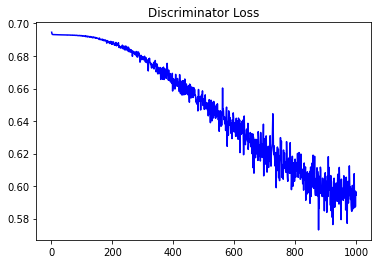

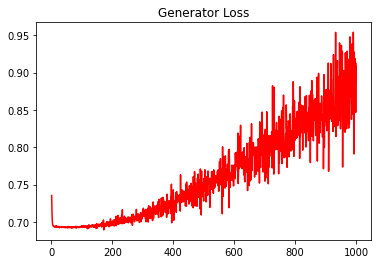

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.25676350556676414


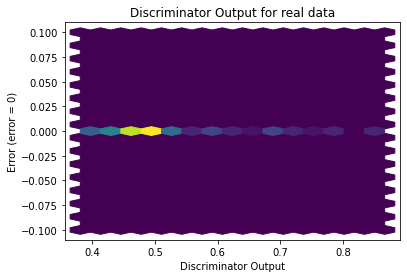

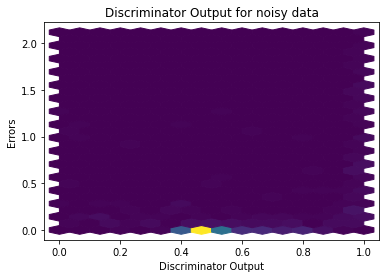

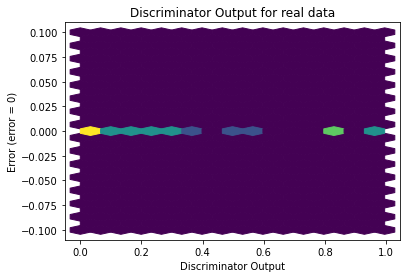

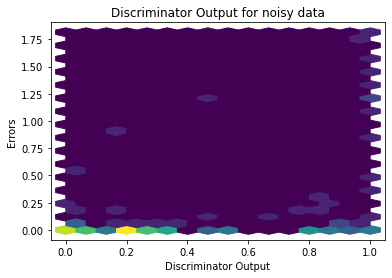

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
